# **OpenCV Presentation**

### Brilliant Mind and Mentorship:
- José Miguel Rodrigues (@josemiguel.rodrigues)

### Developed by:
- Ana Rita Ribeiro (@anarita.ribeiro)

### This demo aims to show the potential of OpenCV to integrate in the future the 3D Project (who knows?)

- OpenCV is an open-source library mainly aimed at real-time computer vision
    - Innovate the platform's functionalities as they can rotate the 3D asset using their eyes instead of using the mouse
    - Allows to help people with mobility difficulties
    
---

## 1º Step - Detect Face

- Make picture gray: algorithm needs black & white scale
- Algorithm used to detect face through gray picture:
    - *Haar Cascade Detection - haarcascade_frontalface_default.xml*
- Draws a rectangle on the faces that appear in the picture

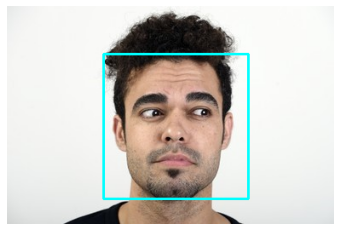

In [12]:
import cv2
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from libs import FaceGateway

img = cv2.imread('./data/face_right.jpg')

face_coordinates = FaceGateway.detectFace(img)

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 2º Step - Detect Eyes

- Make face gray: at this phase we already have the face, so it's easier to obtain the eyes from there than from the whole picture again.
- Algorithm used to detect eyes through gray face:
    - *Haar Cascade Detection - haarcascade_eye.xml*
- Draws a rectangle on the eyes that appear in the picture

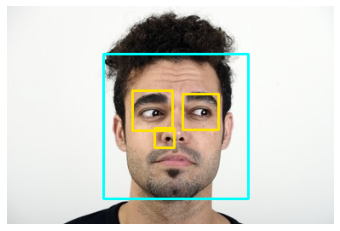

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from libs import EyesGateway

EyesGateway.detectEyesWithoutRules(img, face_coordinates)

## 3º Step - Computer Vision Way

- Do the same thing from previous script, using the same algorithm for eye detection
- Eyes are always in the top half of the face frame, so it has additional logic to detect only eyes (the real ones) that are above the middle of the face height

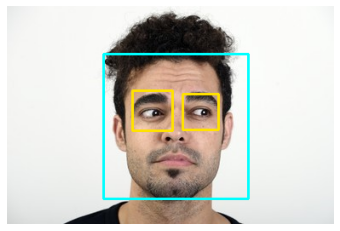

In [14]:
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from libs import EyesGateway

eyes = EyesGateway.detect_eyes(img, face_coordinates)

plt.axis("off")    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 4º Step - Detect Pupils

- Algorithm used to detect pupils:
    - *Blob detection*
- This detector will use the pupil area as the detection parameter for best results. No pupil will be more than 1500 pixels, but many false detections are.
- Blob detector detects what its name suggests: blobs. The good thing about it is that it works with binary images(only two colors). To get a binary image, we need a grayscale image first
    - Make eyes gray: at this phase we already have the eyes, so it's easier to obtain the pupils
- In digital image processing, from a grayscale image, thresholding can be used to create binary images.
    - If the pixel value is smaller than the threshold, it is set to 0 (black)
    - If the pixel value is bigger than the threshold, it is set to 1 (white)
- Detect pupils and draw keypoints

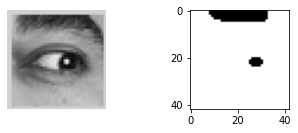

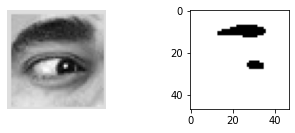

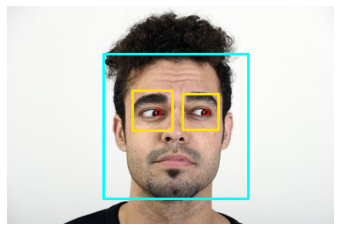

In [15]:
import cv2
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from libs import PupilsGateway

threshold = 81

static = True

PupilsGateway.detect_pupil(img, threshold, face_coordinates, eyes, static)

plt.axis("off")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## 5º Step - Detect Eye direction

- I only used one eye as an example as I assumed they were both looking in the same direction
- To detect the direction we need first to understand how the eye appears when it’s looking in different directions:
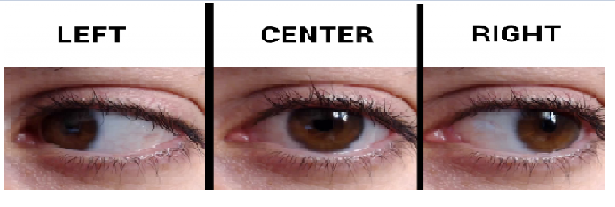
-  The sclera (white part of the eye) fills the right part of the eye when the eye is looking at the left, the opposite happens when it’s looking to the right and when it’s looking to the center the white is well balanced between left and right.
- The idea is to split the eye in two parts and to find out in which of the two parts there is more sclera visible.
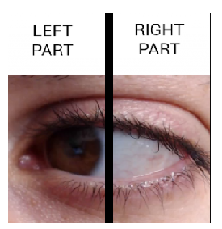
- It's used the binary image of the eyes and with that count the white pixels of two parts of the eye.
- We divide the white pixels of the left part and those of the right part and we get the ratio.

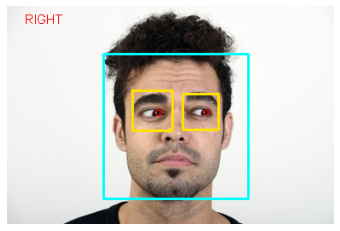

In [16]:
from matplotlib import pyplot as plt
import sys
sys.path.append('..')
from libs import EyeDirectionGateway

threshold = 150

EyeDirectionGateway.detectEyeDirection(eyes, threshold, img, face_coordinates)

plt.axis("off")    
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

## Video Capture

In [17]:
import sys
sys.path.append('..')
from libs import WebCamGateway

static = False

WebCamGateway.videoCapture(static)